# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 08: Extracción de datos online - Webscraping</center></h1>

Este ejercicio busca que los estudiantes aprendan a usar librerias en Python para la lectura de datos desde la Web.


## 1. Nueva librería: `BeautifulSoup`.

Python tiene librerías específicas para hacer Web Scraping, las que nos ayudan a procesar el código HTML para analizarlo y recuprar los datos relevantes. 

El proceso de webscrapping en su expresión mas básica consiste en la extracción de datos desde el texto plano que estructura la página web (HTML). `requests` nos brinda herramientas para la extracción de la página, y a continuación podemos usar otras librerías como `BeautifulSoup` para la extracción de elementos o información contenida en el texto plano.

### Para instalar `BeautifulSoup`:

Esta librería está disponible en Anaconda, por lo que no deberían necesitar instalarlo, pero por si no lo tienen las opciones son:

`pip install BeautifulSoup4`

o

`conda install beautifulsoup4`

## 2. Extraccion por Web Scraping

Partamos cargando las librerías relevantes para esta clase.

In [ ]:
# librerías
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

### 2.1 Leamos el código HTML de ejemplo

Veamos primero un ejemplo simple de código HTML para comprender su estructura general.

In [ ]:
html_text=open('ejemplo.html','r').read()
html_text

### 2.2 Usemos `BeautifulSoup` para hacer sentido de este código

Usamos la librería para revisar el código HTML y poder hacer sentido de lo que tenemos.

In [ ]:
soup = bs(html_text, "html.parser")
soup

Esta librería además nos permite buscar información en forma simple y rápido:

In [ ]:
soup.table.find_all('tr')

In [ ]:
table = soup.find('table')
print(table)

### 2.3 Usemos `BeautifulSoup` para hacer sentido de este código

Usamos la librería para revisar el código HTML y poder hacer sentido de lo que tenemos.

In [ ]:
df = pd.DataFrame(columns=['Curso', 'Creditos', 'nEstudiantes'])
table = soup.find('table')
rows = table.find_all('tr')

for row in rows[1::]:
    cols = row.find_all("td")
    col_text=[c.text for c in cols]
    print(col_text)
    new_row = pd.DataFrame({'Curso':col_text[0], 'Creditos':col_text[1], 'nEstudiantes':col_text[2]}, index=['Curso'])
    df = pd.concat([df, new_row], ignore_index=True)
df

## 3. Apliquemos lo aprendido

Tratemos de contestar la siguiente pregunta:
¿Cuanto exporta de café el mayor exportador del mundo con respecto a todas las exportaciones mundiales?

Esta información la podemos extraer de Wikipedia como fuente: https://en.wikipedia.org/wiki/List_of_countries_by_coffee_production

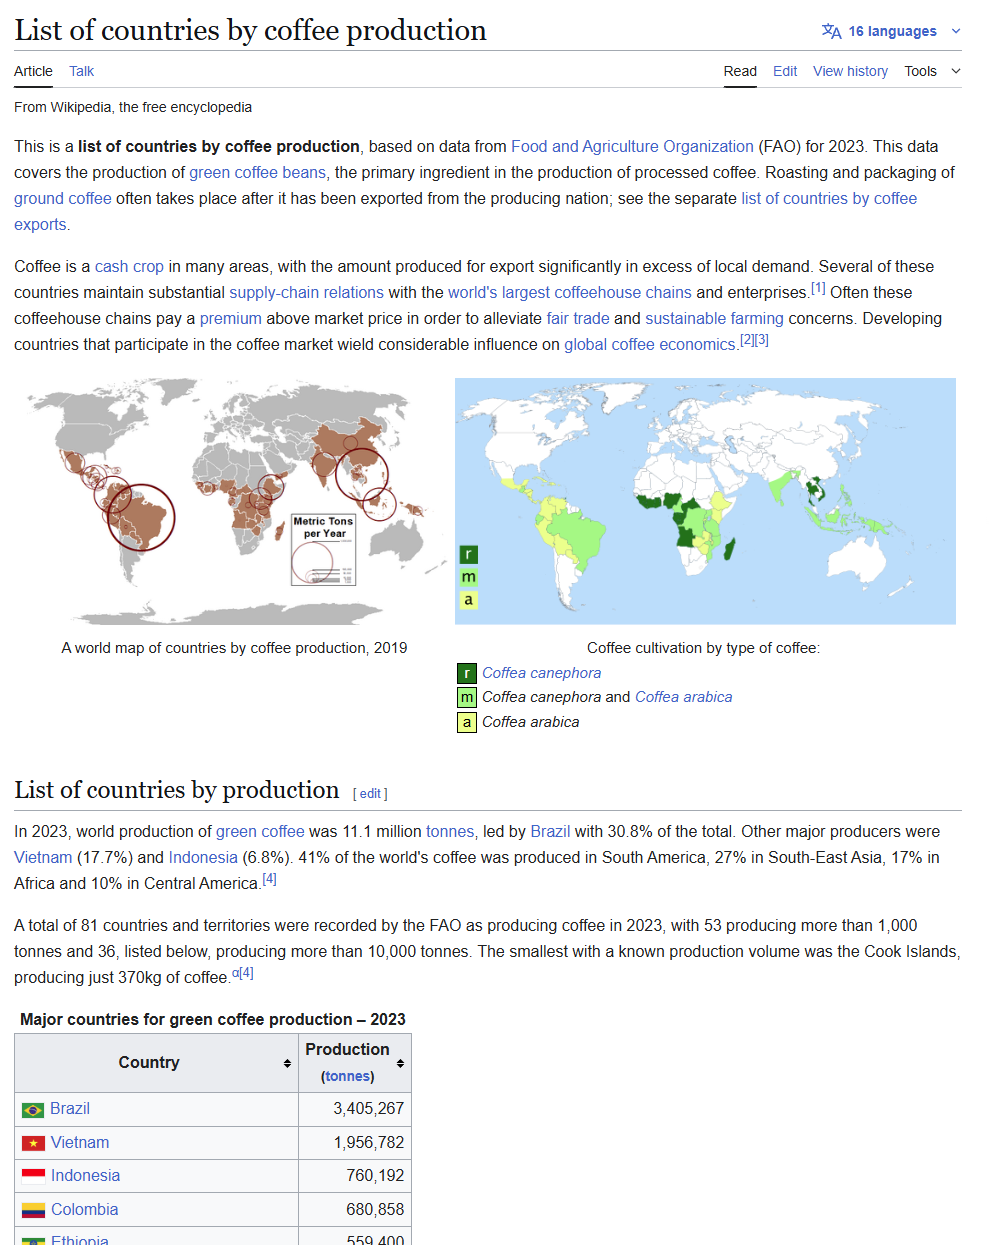

In [ ]:
#rl = "https://en.wikipedia.org/wiki/List_of_countries_by_coffee_production"
url = "https://en.wikipedia.org/w/index.php?title=List_of_countries_by_coffee_production&oldid=1284105905"
headers = {"User-Agent": "imt2200-class-notebook"}
page = requests.get(url, headers=headers, timeout=10)
print(page.status_code)  # debería ser 200
html = page.text[:500]   # primeras 500 letras de la página
print(html)

In [ ]:
soup = bs(page.text)
soup

Al inspeccionar la página, podemos ver que los nombres de países y cantidades están enmarcadas por la etiqueta `<table>`. Dado que es la primera tabla de la página, fondemos usar la función `find` para extraerla. Esto nos entrega todo el contenido de la tabla, incluyendo el encabezado (primera fila) y las cantidades en distintas unidades.

In [ ]:
tables = soup.find_all('table')
len(tables)

In [ ]:
tables[0]

In [ ]:
table = soup.find('table')
table

Pasemos esto a un DataFrame.

In [ ]:
tables[1]

In [ ]:
#creamos un DataFrame vacío con los títulos de la tabla
df = pd.DataFrame(columns = ['country','bags_60kg','tons_metric','pounds'])

# iterar sobre cada fila ('tr') para completar la información
for row in tables[1].find_all('tr')[1::]:
    cols = row.find_all("td")
    if len(cols) > 0:
        #print(cols)
        cols = [col.text.strip() for col in cols]
        #print(cols)
        country = cols[1]
        bags = cols[2]
        tons = cols[3]
        pounds = cols[4]
        new_row = pd.DataFrame({'country': country, 'bags_60kg': bags, 'tons_metric': tons,'pounds':pounds}, index=['country'])
        df = pd.concat([df, new_row], ignore_index=True)
df.head()

In [ ]:
# total de exportación
df['tons_metric'].sum()

In [ ]:
bags

In [ ]:
type(bags)

In [ ]:
int(bags)

In [ ]:
int(bags.replace(',', ''))

In [ ]:
#creamos un DataFrame vacío con los títulos de la tabla
df = pd.DataFrame(columns = ['country','bags_60kg','tons_metric','pounds'])

# iterar sobre cada fila ('tr') para completar la información
for row in tables[1].find_all('tr')[1::]:
    cols = row.find_all("td")
    if len(cols) > 0:
        #print(cols)
        cols = [col.text.strip() for col in cols]
        #print(cols)
        country = cols[1]
        bags = int(cols[2].replace(',', ''))
        tons = int(cols[3].replace(',', ''))
        pounds = int(cols[4].replace(',', ''))
        new_row = pd.DataFrame({'country': country, 'bags_60kg': bags, 'tons_metric': tons,'pounds':pounds}, index=['country'])
        df = pd.concat([df, new_row], ignore_index=True)
df.head()

In [ ]:
# total de exportación
df['tons_metric'].sum()

In [ ]:
100*df['tons_metric'][0]/df['tons_metric'].sum()

<div class="alert alert-block alert-info">
<b> Desafío:</b> En la página https://en.wikipedia.org/wiki/Winemaking está una tabla con los principales fabricantes de vino en el mundo entre 2010 y 2018. Escriba un código que, en forma automática, tome los datos de esa tabla y genere un gráfico que muestre el porcentaje que representa la producción de Chile respecto del mundo a lo largo de esos años.
    
<b> Las tres primeras respuestas correctas tienen +0.2 en la Tarea 1.</b>
</div>

In [ ]:
# respuesta: